In [2]:
import sys
from pathlib import Path

In [3]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [32]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [5]:
import yolov1
from yolov1.config import parse_config

In [13]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes_pil, draw_boxes_tensor
from yolov1.utils.general import decode_labels

## config

In [34]:
config_path = "../yolov1/src/yolov1/configs/default.yaml"

In [35]:
config = parse_config(config_file=config_path)

config

YOLOConfig(data=DataConfig(root='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data', train='valid', val='valid', names=['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'], augmentations=AugmentationsConfig(horizontal_flip=0.8, vertical_flip=0.0, brightness_contrast=0.8, shift_scale_rotate=0.0, random_crop=0.8, random_crop_dims=(224.0, 224.0))), training=TrainingConfig(batch_size=8, num_workers=4, learning_rate=0.001, epochs=30, checkpoints_dir='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints', save_freq=10), inference=InferenceConfig(batch_size=2, checkpoint='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/final_epoch_50.pt', source='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/valid/images'), model=ModelConfig(backbone='resnet18', pretrained=True, backbone_output_channels=512, detector_hidden_sz=1024, input_size=(224, 224), conf_th=0.0, S=7, B=1, nc=5))

## dataset

In [10]:
train_ds = YOLODataset(config, mode="train")

2024-05-07T07:25:40.007712Z [info     ] Loaded 250 samples             func_name=get_data lineno=68


In [11]:
len(train_ds[2])

2

In [12]:
sample = train_ds[4]

In [15]:
sample[0].shape

torch.Size([3, 224, 224])

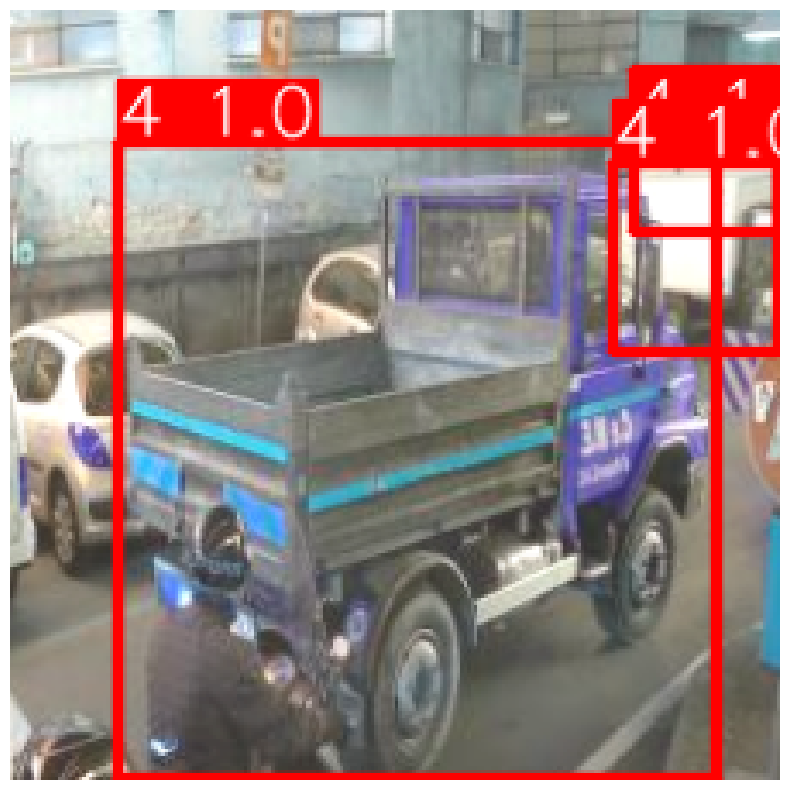

In [16]:
draw_boxes_tensor(
    sample[0],
    decode_labels(sample[1], config.model.S, config.model.B, config.model.nc))

In [17]:
val_ds = YOLODataset(config, mode="val")

2024-05-07T07:27:37.219178Z [info     ] Loaded 250 samples             func_name=get_data lineno=68


## dataloader

In [124]:
train_dataloader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=config.training.batch_size,
        shuffle=True,
        num_workers=config.training.num_workers,
    )
# val_dataloader = torch.utils.data.DataLoader(
#     val_ds,
#     batch_size=config.training.batch_size,
#     shuffle=False,
#     num_workers=config.training.num_workers
# )

Reloading 'yolov1.data.dataset'.


In [131]:
images.dtype

torch.uint8

In [130]:
labels.shape

torch.Size([4, 7, 7, 10])

## arch

In [14]:
# from yolov1.models.arch import YOLOv1

In [15]:
# model = YOLOv1(config.model)

## train

In [36]:
from yolov1.train import main

In [37]:
main(config)

2024-05-07T07:35:02.646643Z [info     ] Loaded 250 samples             func_name=get_data lineno=68
Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-07T07:35:03.438888Z [info     ] Loaded model successfully      func_name=main lineno=45


/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


2024-05-07T07:35:24.328519Z [info     ] Epoch [1/30], Train Loss: 1140.9562 func_name=main lineno=55
2024-05-07T07:35:46.520557Z [info     ] Epoch [2/30], Train Loss: 134.4155 func_name=main lineno=55
2024-05-07T07:36:07.299020Z [info     ] Epoch [3/30], Train Loss: 98.5302 func_name=main lineno=55
2024-05-07T07:36:27.710678Z [info     ] Epoch [4/30], Train Loss: 85.1027 func_name=main lineno=55
2024-05-07T07:36:48.518642Z [info     ] Epoch [5/30], Train Loss: 73.7467 func_name=main lineno=55
2024-05-07T07:37:09.011844Z [info     ] Epoch [6/30], Train Loss: 72.5535 func_name=main lineno=55
2024-05-07T07:37:29.909395Z [info     ] Epoch [7/30], Train Loss: 65.8206 func_name=main lineno=55
2024-05-07T07:37:50.334250Z [info     ] Epoch [8/30], Train Loss: 62.0613 func_name=main lineno=55
2024-05-07T07:38:11.215759Z [info     ] Epoch [9/30], Train Loss: 59.9445 func_name=main lineno=55
2024-05-07T07:38:31.676602Z [info     ] Epoch [10/30], Train Loss: 54.4050 func_name=main lineno=55
2024-0

## infer

In [20]:
from yolov1.detect import main as detect_main
from yolov1.data.dataset import InferenceDataset

In [38]:
config.inference.checkpoint = '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/final_epoch_30.pt'

In [39]:
for res in detect_main(config):
    break

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-07T07:55:08.045762Z [info     ] Model loaded successfully      func_name=main lineno=56


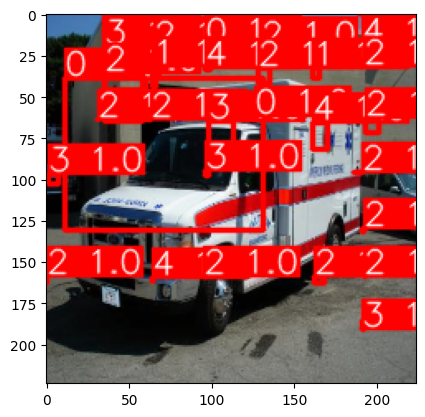

In [40]:
plt.imshow(res["drawn"][0])

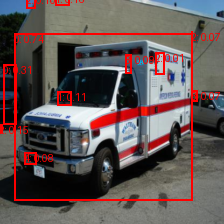

In [15]:
res[0]